# Genetic algorithms

## Product class

In [1]:
class Product():
  def __init__(self, name, space, price):
    self.name = name
    self.space = space
    self.price = price

In [2]:
p1 = Product('Refrigerator A', 0.751, 999.9)

In [3]:
p1.name, p1.space, p1.price

('Refrigerator A', 0.751, 999.9)

In [4]:
p2 = Product('Cell phone', 0.00000899, 2199.12)

In [5]:
p2.name, p2.space, p2.price

('Cell phone', 8.99e-06, 2199.12)

In [6]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))

In [7]:
for product in products_list:
  print(product.name, ' - ', product.price, ' - ', product.space)

Refrigerator A  -  999.9  -  0.751
Cell phone  -  2199.12  -  8.99e-06
TV 55  -  4346.99  -  0.4
TV 50'   -  3999.9  -  0.29
TV 42'   -  2999.0  -  0.2
Notebook A  -  2499.9  -  0.0035
Ventilator  -  199.9  -  0.496
Microwave A  -  308.66  -  0.0424
Microwave B  -  429.9  -  0.0544
Microwave C  -  299.29  -  0.0319
Refrigerator B  -  849.0  -  0.635
Refrigerator C  -  1199.89  -  0.87
Notebook B  -  1999.9  -  0.498
Notebook C  -  3999.0  -  0.527


## Individual Class

In [8]:
from random import random

In [9]:
random()

0.18861729440202046

In [10]:
class Individual():
    def __init__(self, spaces, prices, space_limit, generation=0):
        self.spaces = spaces
        self.prices = prices
        self.space_limit = space_limit
        self.generation = generation
        self.Chromosome = []

        self.score_evaluation = 0
        self.used_space = 0

        for i in range(len(spaces)):
            if random() < 0.5:
                self.Chromosome.append('0')
            else:
                self.Chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0
        for i in range(len(self.Chromosome)):
            if self.Chromosome[i] == '1':
                score += self.prices[i]
                sum_spaces += self.spaces[i]
        if sum_spaces > self.space_limit:
            score = 1

        self.score_evaluation = score
        self.used_space = sum_spaces

    def crossover(self, other_individual):
        cutoff = round(random() * len(self.Chromosome))
        #print(cutoff)

        child1 = other_individual.Chromosome[0:cutoff] + self.Chromosome[cutoff::]
        child2 = self.Chromosome[0:cutoff] + other_individual.Chromosome[cutoff::]

        #print(child1)
        #print(child2)

        children = [Individual(self.spaces, self.prices, self.space_limit, self.generation + 1),
                    Individual(self.spaces, self.prices, self.space_limit, self.generation + 1)]
        children[0].Chromosome = child1
        children[1].Chromosome = child2

        return children

    def mutation(self, rate):
        #print('Before: ', self.Chromosome)
        for i in range(len(self.Chromosome)):
            if random() < rate:
                if self.Chromosome[i] == '1':
                    self.Chromosome[i] = '0'
                else:
                    self.Chromosome[i] = '1'
        #print('After: ', self.Chromosome)
        return self


In [11]:
spaces = []
prices = []
names = []

for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3

print(spaces)
print(prices)
print(names)

[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
['Refrigerator A', 'Cell phone', 'TV 55', "TV 50' ", "TV 42' ", 'Notebook A', 'Ventilator', 'Microwave A', 'Microwave B', 'Microwave C', 'Refrigerator B', 'Refrigerator C', 'Notebook B', 'Notebook C']


In [12]:
individual1 = Individual(spaces, prices, limit)
individual1.fitness()

print('Score: ', individual1.score_evaluation)
print('Used space: ',individual1.used_space)
print('Chromosome: ',individual1.Chromosome)

Score:  1
Used space:  4.1805
Chromosome:  ['1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1']


In [13]:
individual2 = Individual(spaces, prices, limit)
individual2.fitness()

print('Score: ', individual2.score_evaluation)
print('Used space: ',individual2.used_space)
print('Chromosome: ',individual2.Chromosome)

Score:  16431.760000000002
Used space:  2.40470899
Chromosome:  ['1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0']


In [14]:
children = individual1.crossover(individual2)
children[0].fitness()
print(children[0].score_evaluation)
print(children[0].Chromosome)
children[1].fitness()
print(children[1].score_evaluation)
print(children[1].Chromosome)

1
['1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '1']
9733.64
['1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0']


In [15]:
individual1.mutation(0.5)

In [16]:

class GeneticAlgorithm():
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []

    def initialize_population(self, spaces, prices, space_limit):
        for i in range(self.population_size):
            self.population.append(Individual(spaces, prices, space_limit))
        self.best_solution = self.population[0]

    def order_population(self):
        self.population = sorted(self.population, key=lambda population: population.score_evaluation, reverse=True)

    def best_individual(self, individual):
        if individual.score_evaluation > self.best_solution.score_evaluation:
            self.best_solution = individual

    def sum_evaluations(self):
        sum = 0

        for individual in self.population:
            sum += individual.score_evaluation
        return sum

    def visualize_generation(self):
        best = self.population[0]
        print('Generation: ', best.generation,
              'Space: ', best.used_space,
              'Total price: ', best.score_evaluation,
              'Chromosome: ', best.Chromosome
              )

    def select_parents(self, sum_evaluation):
        parent = -1
        random_value = random() * sum_evaluation

        sum = 0
        i = 0
        while i < len(self.population) and sum < random_value:
            sum += self.population[i].score_evaluation
            parent += 1
            i += 1
        return parent


    def solve(self, mutation_probability, number_of_generations, spaces, prices, limit):
        self.initialize_population(spaces, prices, limit)
        for individual in self.population:
            individual.fitness()
        self.order_population()
        self.best_solution = self.population[0]
        self.list_of_solutions.append(self.best_solution)

        self.visualize_generation()
        for generation in range(number_of_generations):
            sum = self.sum_evaluations()
            new_population = []
            for new_individuals in range(0, self.population_size, 2):
                parent1 = self.select_parents(sum)
                parent2 = self.select_parents(sum)

                children = self.population[parent1].crossover(self.population[parent2])
                new_population.append(children[0].mutation(mutation_probability))
                new_population.append(children[1].mutation(mutation_probability))

            self.population = list(new_population)

            for individual in self.population:
                individual.fitness()
            self.order_population()
            best = self.population[0]
            self.list_of_solutions.append(best)
            self.best_individual(best)
            self.visualize_generation()

        print('Generation: ', self.best_solution.generation,
                'Space: ', self.best_solution.used_space,
                'Total price: ', self.best_solution.score_evaluation,
                'Chromosome: ', self.best_solution.Chromosome
                )
        return self.best_solution


In [17]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)

for individual in ga.population:
    individual.fitness()

ga.order_population()

for individual in ga.population:
    print(individual.Chromosome)
    print(individual.score_evaluation)

['0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1']
18831.46
['0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1']
18783.66
['1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0']
17282.55
['1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0']
16283.55
['0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1']
15275.11
['0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1']
14426.11
['1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0']
14276.489999999998
['0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0']
14174.81
['0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0']
13546.1
['0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1']
12896.1
['1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0']
11045.869999999999
['0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0']
10977.0
['1', '0', '1', '1', '0

In [18]:
ga.best_individual(ga.population[0])
ga.best_solution.score_evaluation

18831.46

In [19]:
sum = ga.sum_evaluations()
print(sum)

217784.07


In [20]:
parent1 = ga.select_parents(sum)
print(parent1)

parent2 = ga.select_parents(sum)
print(parent2)


16
9


In [21]:
new_population = []
mutation_probability = 0.01
for new_individuals in range(0 ,ga.population_size, 2):
    # print(new_individuals)
    parent1 = ga.select_parents(sum)
    parent2 = ga.select_parents(sum)
    #print(parent1, parent2)
    children = ga.population[parent1].crossover(ga.population[parent2])
    #print(children[0].Chromosome)
    #print(children[1].Chromosome)

    new_population.append(children[0].mutation(mutation_probability))
    new_population.append(children[1].mutation(mutation_probability))

## Putting all together

In [22]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))


spaces = []
prices = []
names = []

for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3

print(spaces)
print(prices)
print(names)

limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100

ga = GeneticAlgorithm(population_size)
result = ga.solve(mutation_probability, number_of_generations, spaces, prices, limit)
print(result)

[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
['Refrigerator A', 'Cell phone', 'TV 55', "TV 50' ", "TV 42' ", 'Notebook A', 'Ventilator', 'Microwave A', 'Microwave B', 'Microwave C', 'Refrigerator B', 'Refrigerator C', 'Notebook B', 'Notebook C']
Generation:  0 Space:  2.34320899 Total price:  20282.559999999998 Chromosome:  ['0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1']
Generation:  1 Space:  2.7998089900000003 Total price:  19701.75 Chromosome:  ['0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1']
Generation:  2 Space:  2.60880899 Total price:  19822.9 Chromosome:  ['0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0']
Generation:  3 Space:  2.60880899 Total price:  19822.9 Chromosome:  ['0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0']
Generat

In [23]:
for value in ga.list_of_solutions:
    print(value)

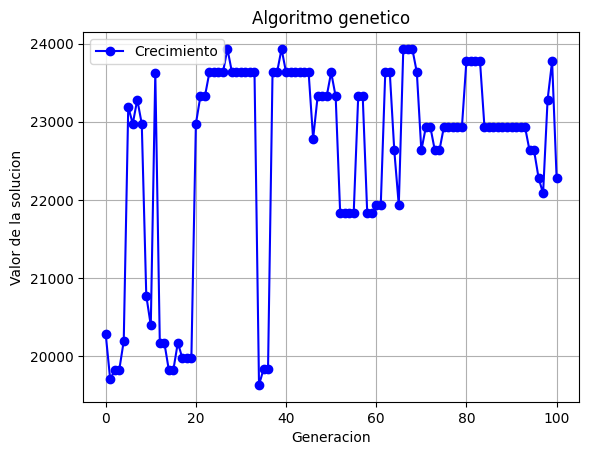

In [24]:
import matplotlib.pyplot as plt

generations= []
solutions = []

for value in ga.list_of_solutions:
    generations.append(value.generation)
    solutions.append(value.score_evaluation)

plt.plot(generations, solutions, marker='o', linestyle='-', color='b', label='Crecimiento')
plt.xlabel('Generacion')
plt.ylabel('Valor de la solucion')
plt.title('Algoritmo genetico')
plt.legend()
plt.grid(True)
plt.show()


- https://github.com/DEAP/deap

In [25]:
%pip install deap

Note: you may need to restart the kernel to use updated packages.


In [26]:
class Product():
  def __init__(self, name, space, price):
    self.name = name
    self.space = space
    self.price = price

In [27]:
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))


spaces = []
prices = []
names = []

for product in products_list:
    spaces.append(product.space)
    prices.append(product.price)
    names.append(product.name)
limit = 3

print(spaces)
print(prices)
print(names)

limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100


[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
['Refrigerator A', 'Cell phone', 'TV 55', "TV 50' ", "TV 42' ", 'Notebook A', 'Ventilator', 'Microwave A', 'Microwave B', 'Microwave C', 'Refrigerator B', 'Refrigerator C', 'Notebook B', 'Notebook C']


In [28]:
import numpy
import random
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [29]:
def fitness(solution):
    cost = 0
    sum_space = 0
    for i in range(len(solution)):
        if solution[i] == 1:
            cost += prices[i]
            sum_space += spaces[i]
    if sum_space > limit:
        cost = 1
    return cost,

In [30]:
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

In [31]:
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=14)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)
toolbox.register('evaluate', fitness)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.01)
toolbox.register('select', tools.selRoulette)

In [32]:
population = toolbox.population(n = 20)
crossover_probabilty = 1.0
number_of_generations = 100

statistics = tools.Statistics(key = lambda individual: individual.fitness.values)
statistics.register('max', numpy.max)
statistics.register('min', numpy.min)

population, info = algorithms.eaSimple(population, toolbox, crossover_probabilty, mutation_probability, number_of_generations, statistics)

gen	nevals	max    	min
0  	20    	17774.7	1  
1  	20    	16974.8	1  
2  	20    	16636.3	1  
3  	20    	15635.4	8128.1
4  	20    	17431.8	1     
5  	20    	18130.8	9436.67
6  	20    	16734.8	10085.8
7  	20    	16636.3	1      
8  	20    	16784.2	8528.61
9  	20    	15931.6	8528.61
10 	20    	18130.8	11736.7
11 	20    	18130.8	11936.6
12 	20    	19931.5	8736.55
13 	20    	19931.5	11732.7
14 	20    	19281.7	11932.6
15 	20    	18130.8	11932.6
16 	20    	18130.8	11932.6
17 	20    	18130.8	13931.9
18 	20    	18130.8	15731.7
19 	20    	18130.8	15731.7
20 	20    	18130.8	15731.7
21 	20    	18130.8	15931.6
22 	20    	18130.8	15931.6
23 	20    	18130.8	15931.6
24 	20    	18130.8	15931.6
25 	20    	18130.8	15931.6
26 	20    	18130.8	15931.6
27 	20    	18130.8	15931.6
28 	20    	18130.8	15931.6
29 	20    	15931.6	15931.6
30 	20    	15931.6	15931.6
31 	20    	15931.6	15931.6
32 	20    	15931.6	15931.6
33 	20    	15931.6	15931.6
34 	20    	15931.6	15931.6
35 	20    	15931.6	15931.6
36 	20    	15931.6	

In [33]:
best_solutions = tools.selBest(population, 1)
for individual in best_solutions:
  print(individual)
  print(individual.fitness)
  for i in range(len(individual)):
    if individual[i] == 1:
      print('Name: ', names[i], ' - Price: ', prices[i])

[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]
(15931.64,)
Name:  TV 55  - Price:  4346.99
Name:  TV 42'   - Price:  2999.0
Name:  Notebook A  - Price:  2499.9
Name:  Ventilator  - Price:  199.9
Name:  Microwave A  - Price:  308.66
Name:  Microwave B  - Price:  429.9
Name:  Microwave C  - Price:  299.29
Name:  Refrigerator B  - Price:  849.0
Name:  Notebook C  - Price:  3999.0


In [34]:
info.select('max')

[17774.68,
 16974.8,
 16636.269999999997,
 15635.369999999999,
 17431.760000000002,
 18130.760000000002,
 16734.77,
 16636.269999999997,
 16784.239999999998,
 15931.64,
 18130.760000000002,
 18130.760000000002,
 19931.54,
 19931.54,
 19281.66,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 18130.760000000002,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,
 15931.64,


In [35]:
import plotly.express as px
figure = px.line(x = range(0,101), y = info.select('max'), title = 'Genetic algorithm results')
figure.show()